## Logistic Regression from Scratch 


- A popular classification algorithm.
- In LR the dependent variable is binary, and the independent variables can be continuous, discrete or categorical.
- It aims to fins the relationship between the input variables and the probability of the dependent variable being in one of the two categories.
- To convert the outcomes into categorical values, we use the sigmoid function.
- Sigmoid function delivers a probabilistic value ranging from 0 to 1. 

In [1]:
# A sigmoid function (An S-shaped curve)
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Text(0.5, 1.0, 'Sigmoid Function')

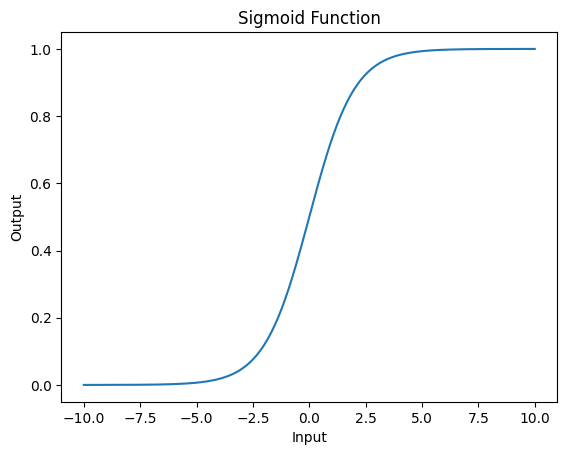

In [5]:
x = np.linspace(-10, 10, 400)
y = sigmoid(x)

# Let's plot the function 
plt.plot(x, y, label='Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Sigmoid Function')

### Cross Entropy Loss 

- Also known as 'Negative-Loss-Likelihood' loss and is a loss function.
- It measures the difference between the target variables' predicted pribability distribution and the true probability distribution.
- The higher the cross-entropy loss, the greater the need to improve the model.
- Commonly used in Neural Networks, Logistic Regression and Softmax Regression.
- This is the function we'll represent in form of a Python function
- 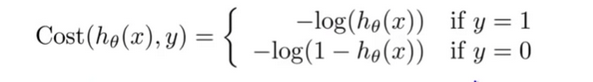

In [10]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    if y == 1: 
        return -np.log(y_hat)
    else:
        return -np.log(1 - y_hat)

# y_hat represents the predicted value / probability value
# y represents the actual label

In [11]:
# Sample values of z 
z = np.arange(-10, 10, 0.1)

# Calculating the hypothesis value 
h_z = sigmoid(z)

# Value of cost function when y = 1 
cost_1 = cross_entropy_loss(h_z, 1)

# Value of cost function when y = 0 
cost_0 = cross_entropy_loss(h_z, 0)

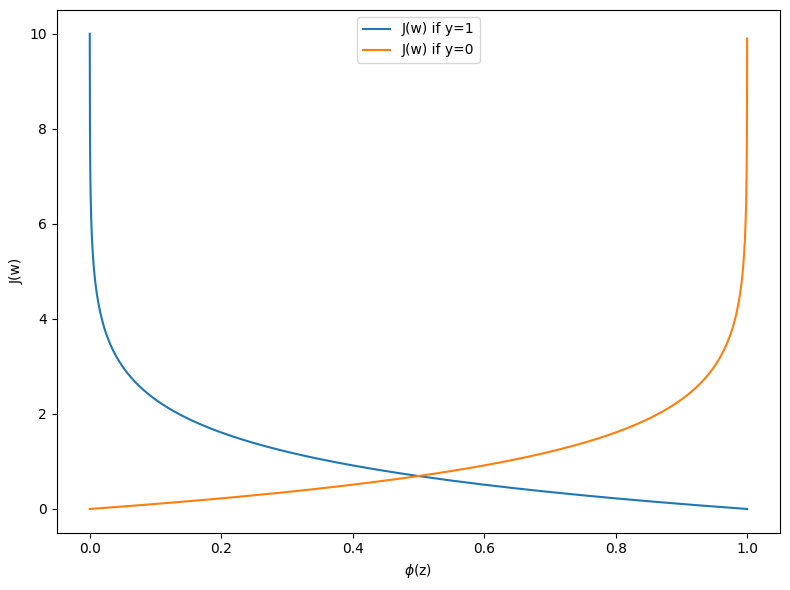

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(h_z, cost_1, label='J(w) if y=1')
plt.plot(h_z, cost_0, label='J(w) if y=0')
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Conclusion 
- For y = 1, the predicted probability is near 1, the loss function out, J(W), is close to 0 otherwise it is close to infinity.
- For y = 0, the predicted probability is near 0, the loss function out, J(W), is close to 0 otherwise it is close to infinty
- The cross-entropy loss function is used as the cost function to measure the difference between the predicted probability distribution of the target variable vs the true probability distribution.
- The cross-entropy loss is high when the predicted probability is way different than the actual class label (0 or 1).
- The cross-entropy loss is less when the predicted probability is closer or nearer to the actual class label (0 or 1).
- The objective of model training is to minimize the cross entropy loss.


- Reference [https://vitalflux.com/cross-entropy-loss-explained-with-python-examples/]

### Logistic Regression 

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr 
        self.n_iters = n_iters 
        self.weights = None 
        self.bias = None 

    def fit(self, X, y):
        n_samples, n_features = X.shape 
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias 
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    def predict(self, x):
        linear_pred = np.dot(X, self.weights) + self.bias 
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
 
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

/tmp/ipykernel_7321/1605744218.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.0


/tmp/ipykernel_7321/2837801808.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.sum(y_pred==y_test)/len(y_test)
